# Example: Find and solve the Euler-Lagrange equation for a two-mass-three-spring system

We are going to put together all of the skills we picked up in the python crash course, the computer classes and the module content to solve a coupled oscillator problem with python. 

Consider two masses connected to three springs as follows:

<center><img src='https://raw.githubusercontent.com/autofeedback-exercises/exercises/main/MTH2031/project/2mass3springs.png' height=300 /></center>

We will set up and solve the equations of motion for this system to determine how the masses move as a function of time. In each section if you have forgotten how a particular aspect works, you can click on the code to take you to the notes page where we covered those aspects.

---

## Setup

First, let's import all of the libraries we will need, and define the constants and variables we already know about.

In [1]:
import sympy as sy
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

t, k1, k2, k3, m1, m2 = sy.symbols('t, k1, k2, k3, m1, m2')

Note that in principle with two particles we have six degrees of freedom, $x_1, y_1, z_1$ and $x_2, y_2, z_2$. However, for now we will restrict ourselves to motion in one direction, as per the diagram given, by setting $y_1 = z_1 = y_2 = z_2 = 0$. Thus we are left with two, generalised coordinates, $x_1$ and $x_2$ which are the positions of the two masses in the diagram above. For the equations of motion, we will also require the masses' velocities, $\dot{x_1}$ and $\dot{x_2}$. Let's define these using sympy

In [2]:
x1 = sy.Function('x1')(t)
x2 = sy.Function('x2')(t)
dx1dt = x1.diff(t)
dx2dt = x2.diff(t)

---
## Lagrangian

Let's introduce the kinetic and potential energies, $T$ and $V$, and build the Lagrangian, $L$. Recall that the kinetic energy is the sum of the kinetic energies of the two particles, and for particle $i$ the kinetic energy is given by 
$$T_i = \frac{1}{2} m_i v_i ^2 = \frac{1}{2} m_i \dot{x}_i^2$$

Thus in sympy:

In [3]:
T = sy.Rational(1, 2) * ((m1*dx1dt**2) + (m2*dx2dt**2))
sy.pprint(T)

              2                 2
   ⎛d        ⎞       ⎛d        ⎞ 
m₁⋅⎜──(x₁(t))⎟    m₂⋅⎜──(x₂(t))⎟ 
   ⎝dt       ⎠       ⎝dt       ⎠ 
─────────────── + ───────────────
       2                 2       


Similarly, the potential energy is the sum of the energy stored in each spring. For springs 1 and 3, the potential energies are $V_1 = \frac{1}{2} k_1 x_1 ^2$ and $V_3 = \frac{1}{2} k_3 x_2 ^2 $ respectively. For spring 2 (the middle spring), the displacement is given by the difference between $x_1$ and $x_2$, and thus the potential energy is $V_2 = \frac{1}{2} k_2 \left( x_1 - x_2\right) ^2 $. In sympy then:

In [4]:
V = sy.Rational(1, 2) * (k1*x1**2 + k3*x2**2 + k2*(x2-x1)**2)
sy.pprint(V)

     2                         2        2   
k₁⋅x₁ (t)   k₂⋅(-x₁(t) + x₂(t))    k₃⋅x₂ (t)
───────── + ──────────────────── + ─────────
    2                2                 2    


The Lagrangian, then is just $L=T-V$

In [5]:
L = sy.simplify(T-V)
sy.pprint(L)

                                                              2               
                                                   ⎛d        ⎞       ⎛d       
       2                        2        2      m₁⋅⎜──(x₁(t))⎟    m₂⋅⎜──(x₂(t)
  k₁⋅x₁ (t)   k₂⋅(x₁(t) - x₂(t))    k₃⋅x₂ (t)      ⎝dt       ⎠       ⎝dt      
- ───────── - ─────────────────── - ───────── + ─────────────── + ────────────
      2                2                2              2                 2    

  2
 ⎞ 
)⎟ 
 ⎠ 
───
   


---
## Generalised Momenta
The momentum of each mass, in terms of the generalised coordinate, is defined as
$$p_i = \frac{\partial L}{\partial \dot x_i}, \quad i=1,2.$$
We already have $L$, $\dot{x_1}$ and $\dot{x_2}$ defined in sympy, so we can use them to define the generalised momenta:


In [6]:
dLdqp1 = sy.diff(L, dx1dt)
dLdqp2 = sy.diff(L, dx2dt)
sy.pprint(dLdqp1)
sy.pprint(dLdqp2)

   d        
m₁⋅──(x₁(t))
   dt       
   d        
m₂⋅──(x₂(t))
   dt       


We'll use these subsequently in the solution of Hamilton's equations.

---

## The Hamiltonian (via the Legendre transform)
First we find the generalised velocities as a function of the generalised coordinates and momenta. This (rather complicated) set of commands to sympy was explained for a previous example here.

In [7]:
v1 = sy.Function('v1')
p1 = sy.Symbol('p1')
v1 = sy.solve(sy.Eq(p1, dLdqp1), dx1dt)[0]
v2 = sy.Function('v2')
p2 = sy.Symbol('p2')
v2 = sy.solve(sy.Eq(p2, dLdqp2), dx2dt)[0]
sy.pprint(v1)
sy.pprint(v2)

p₁
──
m₁
p₂
──
m₂


Next, we perform the Legendre transform of the Lagrangian to find the Hamiltonian. Recall that the formula for this is
$$H(x_1,x_2,p_1,p_2) = \dot x_1 p_1 + \dot x_2 p_2 - L(x_1,x_2,\dot x_1,\dot x_2)|_{\dot x_1 = \dot x_1(p_1),\dot x_2 = \dot x_2(p_2)}$$

In [8]:
H = sy.Function('H')
H = v1*p1 + v2*p2- L.subs(dx1dt, v1).subs(dx2dt, v2)
sy.pprint(sy.simplify(H))

      ⎛     2                        2        2   ⎞        2        2
m₁⋅m₂⋅⎝k₁⋅x₁ (t) + k₂⋅(x₁(t) - x₂(t))  + k₃⋅x₂ (t)⎠ + m₁⋅p₂  + m₂⋅p₁ 
─────────────────────────────────────────────────────────────────────
                               2⋅m₁⋅m₂                               


---

## Equations of motion

Hamilton's equations are: 
$$\dfrac{dx_i}{dt} = \dfrac{\partial H}{\partial p_i},$$
$$\dfrac{dp_i}{dt} = -\dfrac{\partial H}{\partial x_i},$$
for $i=1,2$ (i.e. for each of the masses). We already have our Hamiltonian, $H$, so the RHS of the equations can be evaluated simply with sympy:

In [9]:
dHdq1 = sy.diff(H,x1)
dHdq2 = sy.diff(H,x2)
dHdp1 = sy.diff(H,p1)
dHdp2 = sy.diff(H,p2)

Now we create numerical functions using lambdify

In [10]:
np_dHdq1 = sy.lambdify([x1, x2, p1, k1, k2, k3, m1, m2], dHdq1)
np_dHdq2 = sy.lambdify([x1, x2, p2, k1, k2, k3, m1, m2], dHdq2)
np_dHdp1 = sy.lambdify([x1, x2, p1, k1, k2, k3, m1, m2], dHdp1)
np_dHdp2 = sy.lambdify([x1, x2, p2, k1, k2, k3, m1, m2], dHdp2)

---

## Solving the EOMs with odeint

The function encoding our system of equations can be set up as follows. Note that we have an extra input argument, parameters, compared to what we did in previous exercises, because we wish to vary the spring constants and particle masses

In [11]:
def coupledOscillators(y, t, parameters):
    """Take the positions and momenta of the two particles (stored in y) 
    and return the derivatives of those positions and momenta computed from Hamilton's equations of motion.
    the parameters argument contains the spring constants and particle masses"""
    x1, x2, p1, p2 = y 
    k1, k2, k3, m1, m2 = parameters
    dydt = [np_dHdp1(x1, x2, p1, k1, k2, k3, m1, m2),
            np_dHdp2(x1, x2, p2, k1, k2, k3, m1, m2),
            -np_dHdq1(x1, x2, p1, k1, k2, k3, m1, m2),
            -np_dHdq2(x1, x2, p2, k1, k2, k3, m1, m2)]
    return dydt

Now we almost have everything we need to solve. The last pieces of the puzzle are the initial conditions, and parameter values, which we get to choose. For the initial conditions let's choose to do the following: hold the first particle in its rest position, and displace the second particle by 0.5m. If you can picture this, it means we are stretching the middle spring, and squeezing the third spring (or the other way round, depending on which direction you define as positive). We will then release the system from rest. Thus our initial conditions are:
$$\begin{align} 
x_1 &= 0 \\
x_2 &= 0.5\\
p_1 & =0\\
p_2 &=0
\end{align}$$
Moreover, let's choose some values for the masses and spring constants:
$$\begin{align} 
k_1 &= 1 \\
k_2 &= 0.1\\
k_3 & =1\\
m_1 &= 2 \\
m_2 &=2
\end{align}$$
This means the system is symmetric, but of course you can set whatever positive values you want here.

We encode these initial conditions and parameters in the python as follows. Note how the parameters are passed to `odeint` as the optional argument args. This tells `odeint` to pass the parameters to `CoupledOscillators` in addition to the coordinates and time.

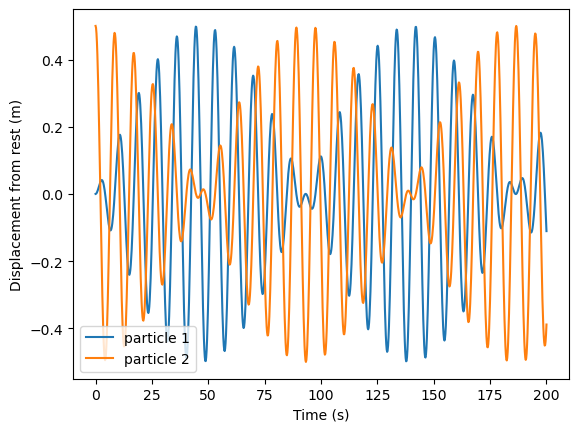

In [13]:
y0 = [ 0, 0.5, 0, 0 ]  # initial conditions
parameters = [1, 0.1, 1, 2, 2]  # springs/masses
t_values = np.linspace(0, 200, 1000)
sol = odeint(coupledOscillators, y0, t_values, args=(parameters,))

# unpack the solution:
pos1 = sol[:, 0]
pos2 = sol[:, 1]
mom1 = sol[:, 2]
mom2 = sol[:, 3]

plt.plot(t_values, pos1, label='particle 1')
plt.plot(t_values, pos2, label='particle 2')
plt.xlabel('Time (s)')
plt.ylabel('Displacement from rest (m)')
plt.legend()
plt.savefig('Positions.png')

An alternative way of showing these results is in the phase space: i.e. plotting the momentum against displacement for the two masses.

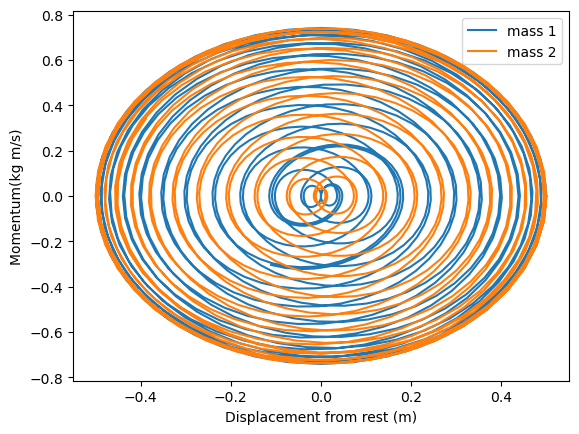

In [14]:
plt.plot(pos1, mom1, label='mass 1')
plt.plot(pos2, mom2, label='mass 2')
plt.xlabel('Displacement from rest (m)')
plt.ylabel('Momentum(kg m/s)')
plt.legend()